In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

C:\Users\PRATEEK\AppData\Local\Temp\ipykernel_10800\2129955256.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


1. Handling Missing Data by removing them

In [5]:
df =  pd.read_csv("C:\\Users\\PRATEEK\\Desktop\\College\\Machine learning\\Data sets\\data_science_job.csv")

In [6]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [7]:
df.isnull().mean()

enrollee_id               0.000000
city                      0.000000
city_development_index    0.025003
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
training_hours            0.039983
target                    0.000000
dtype: float64

In [8]:
df.shape

(19158, 13)

In [9]:
#will remove those columns which has missing values less than 5%, so following columns will be printed
cols = [vars for vars in df.columns if df[vars].isnull().mean()<0.05 and df[vars].isnull().mean()>0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [10]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
15389,0.920,Full time course,Graduate,4.0,80.0
11874,0.830,no_enrollment,Masters,14.0,48.0
19020,0.920,Part time course,Graduate,7.0,21.0
10037,0.878,Part time course,High School,20.0,196.0
4477,0.920,Full time course,High School,6.0,21.0


In [11]:
#after dropping the cols how much data will be remaining 
len(df[cols].dropna())/len(df)

0.8968577095730244

In [12]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((19158, 13), (17182, 5))

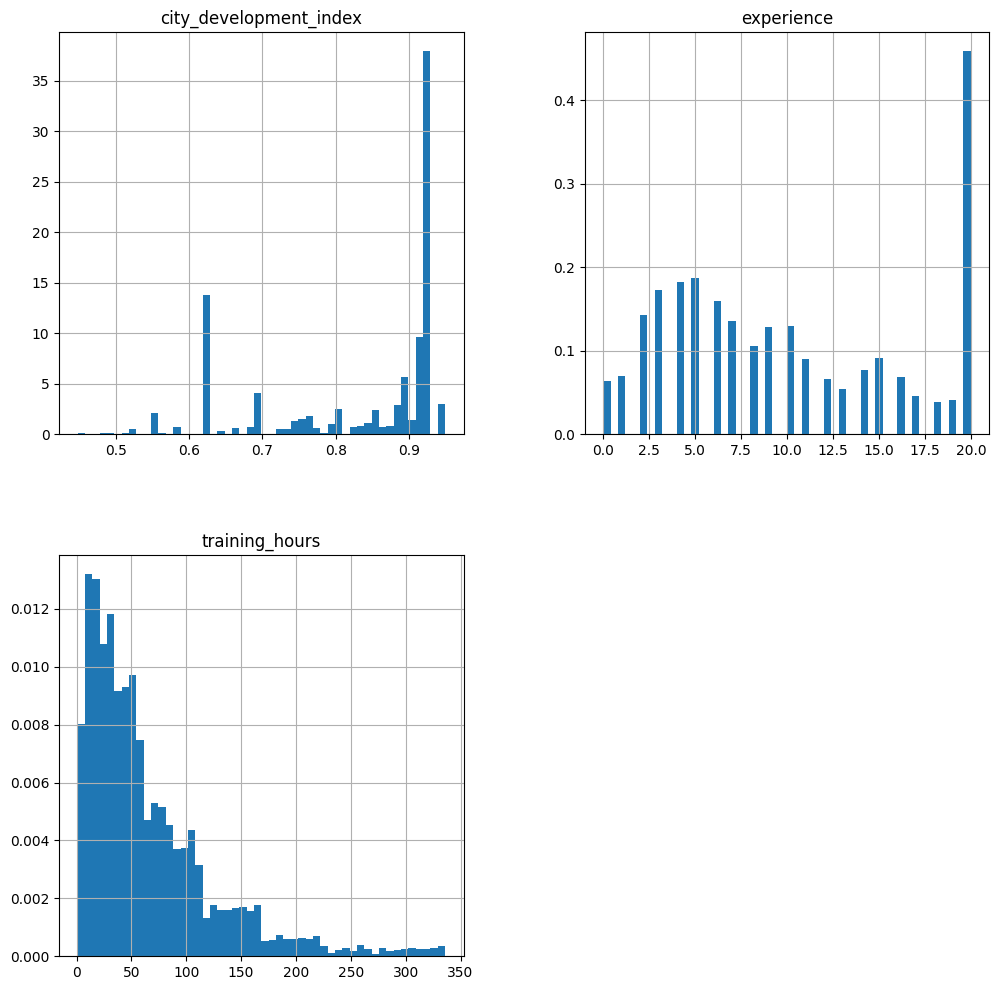

In [13]:
new_df.hist(bins=50, density=True, figsize=(12,12))
plt.show()

<Axes: >

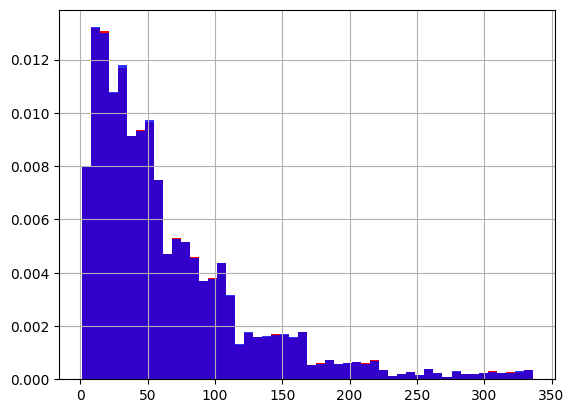

In [17]:
#individually analysing the columns
fig = plt.figure()
ax = fig.add_subplot(111)

#original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

#data after cca, the argument alpha makes the color transparent, so we can see the overlay of 2 distributions
new_df['training_hours'].hist(bins=50, ax=ax, density=True, color='blue', alpha=0.8)

In [18]:
df['education_level'].value_counts()

education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64

In [19]:
#percentage of categories in original data should be similar to the perentage when they are removed
#if this is true then we can perform cca

temp = pd.concat([
    #percentage of observations per category, original data
    df['enrolled_university'].value_counts()/len(df),

    #percentage of observations per category, cca data
    new_df['enrolled_university'].value_counts()/len(new_df)
], axis =1)
temp.columns= ['original','cca']
temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [20]:
temp = pd.concat([
    #percentage of observations per category, original data
    df['education_level'].value_counts()/len(df),

    #percentage of observations per category, cca data
    new_df['education_level'].value_counts()/len(new_df)
], axis =1)
temp.columns= ['original','cca']
temp

,original,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


2. Handling Missing Numerical Data:- Univariate and Multivariate Imputation

2.1 Univariate Imputation:- Mean/Median, Arbitrary, End of Distribution, Random Sample Imputation

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [4]:
df = pd.read_csv("C:\\Users\\PRATEEK\\Desktop\\College\\Machine learning\\Data sets\\titanic_toy.csv")

In [5]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [6]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [7]:
X = df.drop(columns=['Survived'])
y = df['Survived']


In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [29]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [30]:
X_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [31]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [32]:
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)
X_train['Age_median'] = X_train['Age'].fillna(median_age)

X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)
X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)

In [33]:
X_train.sample(5)

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
457,NaN,51.8625,1,29.785904,28.75,51.8625,51.8625
203,45.5,7.2250,0,45.500000,45.50,7.2250,7.2250
583,36.0,40.1250,0,36.000000,36.00,40.1250,40.1250
17,NaN,13.0000,0,29.785904,28.75,13.0000,13.0000
351,NaN,35.0000,0,29.785904,28.75,35.0000,35.0000


In [34]:
print("Original Age variable variance ", X_train['Age'].var())
print("Age variance after mean imputation ", X_train['Age_mean'].var())
print("Age variance after median imputation ", X_train['Age_median'].var())

print("Original Fare variable variance ", X_train['Fare'].var())
print("Fare variance after mean imputation ", X_train['Fare_mean'].var())
print("Fare variance after median imputation ", X_train['Fare_median'].var())

Original Age variable variance  204.34951339046142
Age variance after mean imputation  161.81262452718676
Age variance after median imputation  161.98956633460548
Original Fare variable variance  2448.1979137063163
Fare variance after mean imputation  2324.2385256705534
Fare variance after median imputation  2340.09102197536


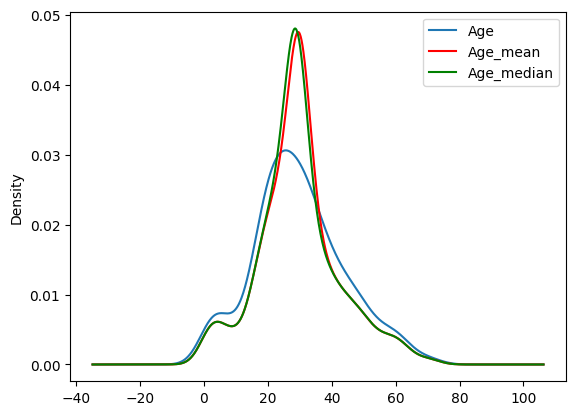

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)

#original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

#variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='red')

#variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='green')

#add legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

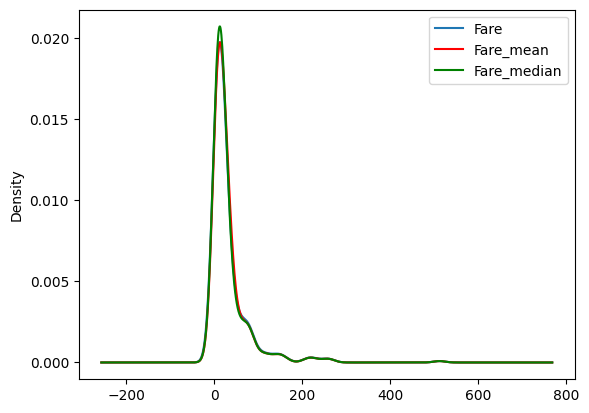

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)

#original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

#variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='red')

#variable imputed with the median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='green')

#add legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [39]:
X_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.665205,64.858859
Fare,70.719262,2448.197914,17.258917,55.603719,57.957599,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.146106,-5.112563,16.385048,16.476305
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,52.788341,51.358000
Age_median,204.349513,57.957599,-5.112563,161.812625,161.989566,55.023037,53.553455
Fare_mean,66.665205,2448.197914,16.385048,52.788341,55.023037,2324.238526,2324.238526
Fare_median,64.858859,2448.197914,16.476305,51.358000,53.553455,2324.238526,2340.091022


In [40]:
X_train.corr()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.090156,0.087356
Fare,0.092644,1.000000,0.208268,0.088069,0.091757,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.244610,-0.242883,0.205499,0.205942
Age_mean,1.000000,0.088069,-0.244610,1.000000,0.999454,0.086078,0.083461
Age_median,1.000000,0.091757,-0.242883,0.999454,1.000000,0.089673,0.086982
Fare_mean,0.090156,1.000000,0.205499,0.086078,0.089673,1.000000,0.996607
Fare_median,0.087356,1.000000,0.205942,0.083461,0.086982,0.996607,1.000000


<Axes: >

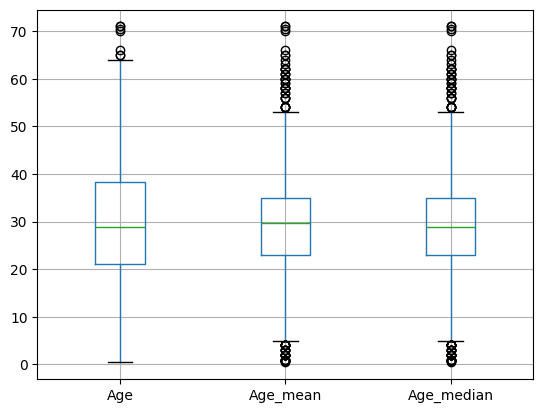

In [41]:
X_train[['Age','Age_mean','Age_median']].boxplot()

<Axes: >

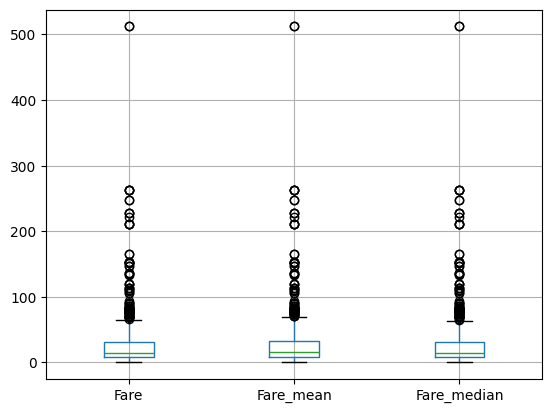

In [42]:
X_train[['Fare','Fare_mean','Fare_median']].boxplot()

Using Sklearn

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [44]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [45]:
trf = ColumnTransformer([
    ('imputer1', SimpleImputer(), ['Age']),
    ('imputer2', SimpleImputer(),['Fare'])
], remainder='passthrough')

In [46]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(), ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [47]:
trf.named_transformers_['imputer1'].statistics_

array([29.78590426])

In [48]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [49]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [50]:
X_train

array([[ 40.        ,  27.7208    ,   0.        ],
       [  4.        ,  16.7       ,   2.        ],
       [ 47.        ,   9.        ,   0.        ],
       ...,
       [ 71.        ,  49.5042    ,   0.        ],
       [ 29.78590426, 221.7792    ,   0.        ],
       [ 29.78590426,  25.925     ,   0.        ]])

Arbitrary Value Imputation

In [9]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

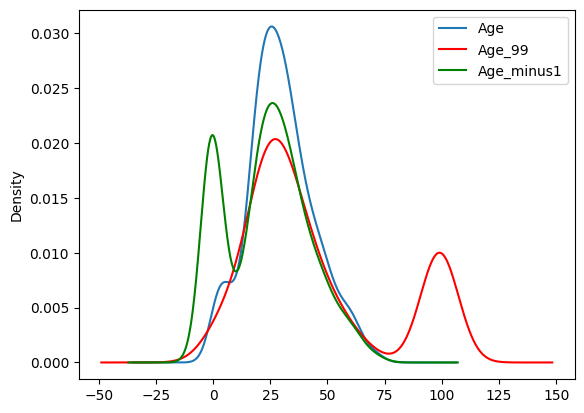

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)

#original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

#variable imputed with the mean
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

#variable imputed with the median
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

#add legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

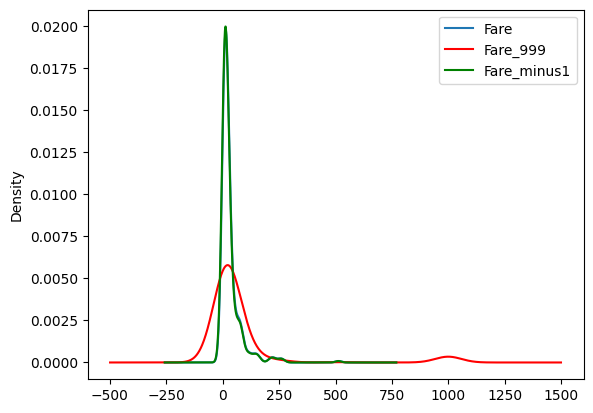

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)

#original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

#variable imputed with the mean
X_train['Fare_999'].plot(kind='kde', ax=ax, color='red')

#variable imputed with the median
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

#add legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [12]:
print("Original Age variable variance ", X_train['Age'].var())
print("Age variance after mean imputation ", X_train['Age_99'].var())
print("Age variance after median imputation ", X_train['Age_minus1'].var())

print("Original Fare variable variance ", X_train['Fare'].var())
print("Fare variance after mean imputation ", X_train['Fare_999'].var())
print("Fare variance after median imputation ", X_train['Fare_minus1'].var())

Original Age variable variance  204.34951339046142
Age variance after mean imputation  951.7275570187188
Age variance after median imputation  318.0896202624488
Original Fare variable variance  2448.1979137063163
Fare variance after mean imputation  47219.202652176304
Fare variance after median imputation  2378.5676784883494


Handling Missing Categorical Data

In [3]:
df = pd.read_csv("C:\\Users\\PRATEEK\\Desktop\\College\\Machine learning\\Data sets\\train (1).csv", usecols=['GarageQual','FireplaceQu','SalePrice'])

In [4]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [5]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

<Axes: xlabel='GarageQual'>

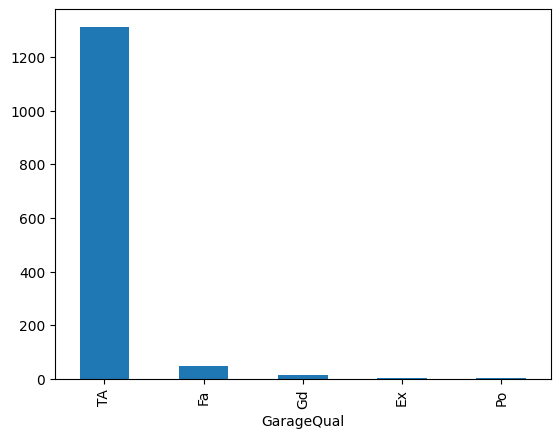

In [6]:
df['GarageQual'].value_counts().plot(kind='bar')

In [7]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'GarageQual')

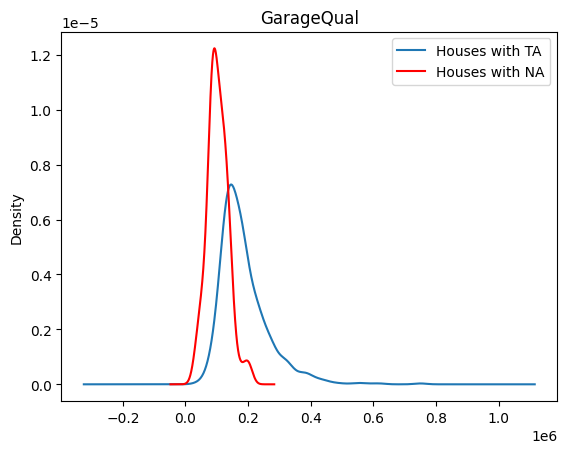

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde')

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines,labels = ax.get_legend_handles_labels()
labels = ['Houses with TA','Houses with NA']
ax.legend(lines,labels,loc='best')
plt.title('GarageQual')

In [9]:
temp = df[df['GarageQual']=='TA']['SalePrice']
df['GarageQual'].fillna('TA', inplace=True)

C:\Users\PRATEEK\AppData\Local\Temp\ipykernel_6044\2948856654.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageQual'].fillna('TA', inplace=True)


<Axes: xlabel='GarageQual'>

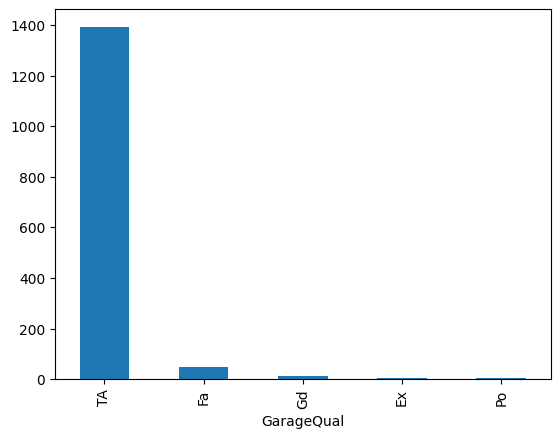

In [10]:
df['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

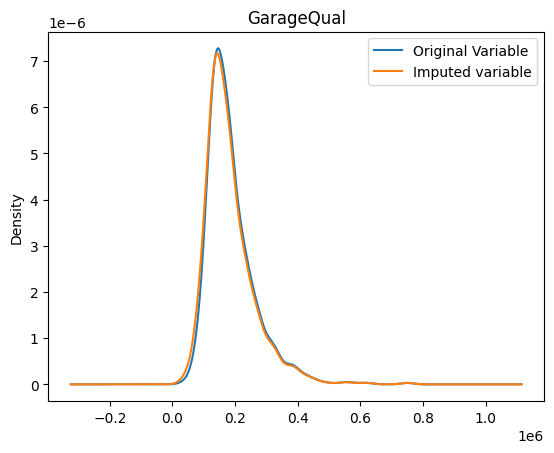

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)

#original variable
temp.plot(kind='kde', ax=ax)

#distribution of variable after imputation
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde')

lines,labels = ax.get_legend_handles_labels()
labels = ['Original Variable','Imputed variable']
ax.legend(lines,labels,loc='best')
plt.title('GarageQual')

<Axes: xlabel='FireplaceQu'>

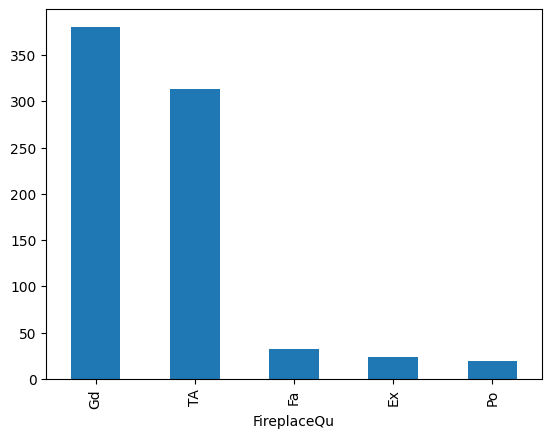

In [12]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [13]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

Text(0.5, 1.0, 'FireplaceQu')

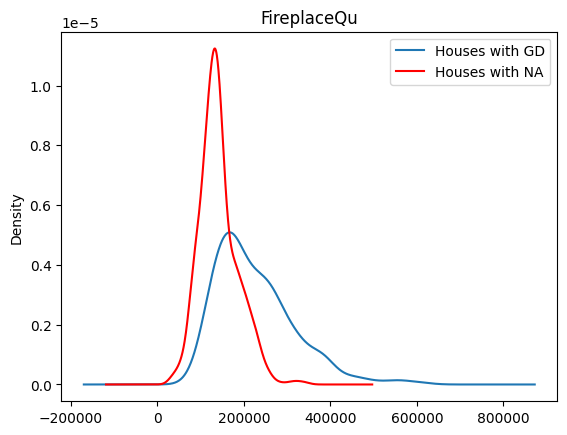

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde')

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines,labels = ax.get_legend_handles_labels()
labels = ['Houses with GD','Houses with NA']
ax.legend(lines,labels,loc='best')
plt.title('FireplaceQu')

In [15]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']
df['FireplaceQu'].fillna('Gd',inplace=True)

C:\Users\PRATEEK\AppData\Local\Temp\ipykernel_6044\2393603310.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FireplaceQu'].fillna('Gd',inplace=True)


<Axes: xlabel='FireplaceQu'>

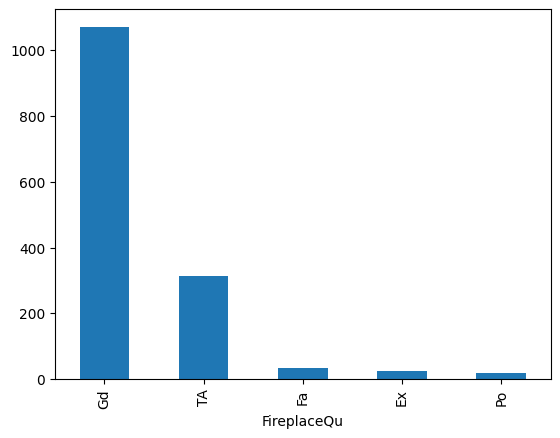

In [16]:
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

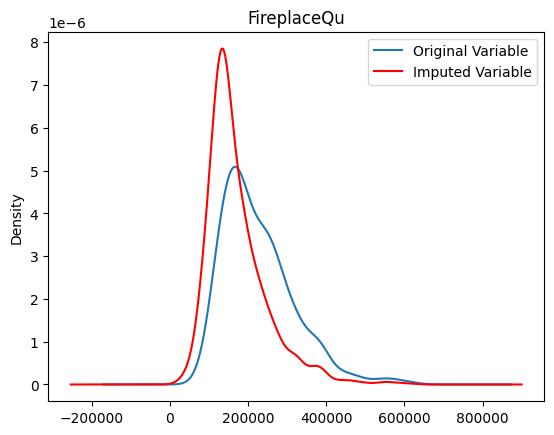

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)

#original variable
temp.plot(kind='kde', ax=ax)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',color='red')

lines,labels = ax.get_legend_handles_labels()
labels = ['Original Variable','Imputed Variable']
ax.legend(lines,labels,loc='best')
plt.title('FireplaceQu')

Random Imputation:- applied to both numerical and categorical data

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

C:\Users\PRATEEK\AppData\Local\Temp\ipykernel_13112\2784470014.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("C:\\Users\\PRATEEK\\Desktop\\College\\Machine learning\\Data sets\\titanic_toy.csv", usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [4]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Survived    0.000000
dtype: float64

In [5]:
X = df.drop(columns=['Survived'])
y = df['Survived']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [6]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [7]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

C:\Users\PRATEEK\AppData\Local\Temp\ipykernel_13112\1252176479.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

In [8]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,10.0
493,71.0,49.5042,71.0
527,NaN,221.7792,22.0


In [9]:
import seaborn as sns

C:\Users\PRATEEK\AppData\Local\Temp\ipykernel_13112\3467508730.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'], label='Original', hist=False)
C:\Users\PRATEEK\AppData\Local\Temp\ipykernel_13112\3467508730.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_

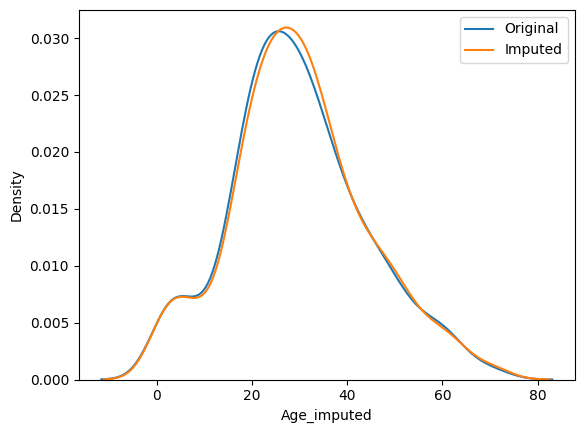

In [11]:
sns.distplot(X_train['Age'], label='Original', hist=False)
sns.distplot(X_train['Age_imputed'], label='Imputed', hist=False)
plt.legend()
plt.show()

In [12]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.34951339046142
Variance after random imputation:  204.41373666283442


In [13]:
X_train[['Fare','Age','Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2448.197914,70.719262,41.605557
Age,70.719262,204.349513,204.349513
Age_imputed,41.605557,204.349513,204.413737


<Axes: >

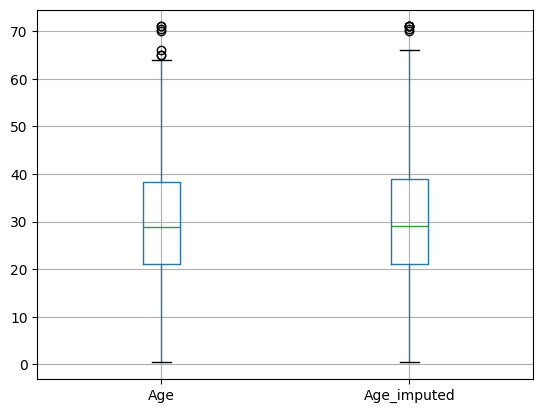

In [14]:
X_train[['Age','Age_imputed']].boxplot()

Random Sample Imputation on categorical data

In [15]:
data = pd.read_csv("C:\\Users\\PRATEEK\\Desktop\\College\\Machine learning\\Data sets\\train (1).csv", usecols=['GarageQual','FireplaceQu','SalePrice'])

In [16]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [17]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [18]:
X= data
y = data['SalePrice']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [19]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [21]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
1337,NaN,NaN,52500,NaN,NaN
1057,Gd,TA,248000,TA,Gd
377,Gd,TA,340000,TA,Gd
279,TA,TA,192000,TA,TA
274,NaN,TA,124500,TA,NaN


In [22]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_test['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_test['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\PRATEEK\AppData\Local\Temp\ipykernel_13112\2056505658.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQ

In [32]:
temp = pd.concat([
    X_train['GarageQual'].value_counts()/len(X_train['GarageQual'].dropna()),
    X_train['GarageQual_imputed'].value_counts()/len(X_train)
], axis=1)
temp.columns=['Original', 'Imputed']
temp

,Original,Imputed
TA,0.951043,0.951199
Fa,0.037171,0.037671
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [33]:
temp = pd.concat([
    X_train['FireplaceQu'].value_counts()/len(X_train['FireplaceQu'].dropna()),
    X_train['FireplaceQu_imputed'].value_counts()/len(X_train)
], axis=1)
temp.columns=['Original', 'Imputed']
temp

,Original,Imputed
Gd,0.494272,0.495719
TA,0.412439,0.410103
Fa,0.040917,0.042808
Po,0.027823,0.027397
Ex,0.024550,0.023973


C:\Users\PRATEEK\AppData\Local\Temp\ipykernel_13112\3617598360.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu']==category]['SalePrice'], hist=False, label=category)
C:\Users\PRATEEK\AppData\Local\Temp\ipykernel_13112\3617598360.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974

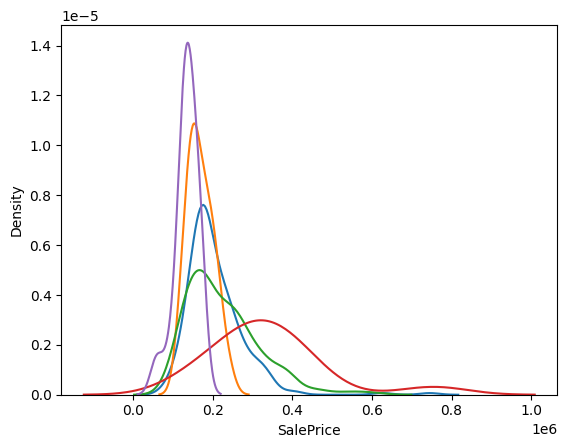

In [34]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu']==category]['SalePrice'], hist=False, label=category)
plt.show()

C:\Users\PRATEEK\AppData\Local\Temp\ipykernel_13112\4290902799.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu_imputed']==category]['SalePrice'], hist=False, label=category)
C:\Users\PRATEEK\AppData\Local\Temp\ipykernel_13112\4290902799.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de441

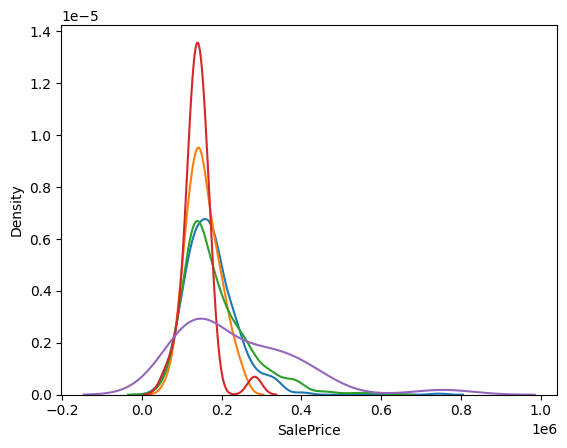

In [35]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed']==category]['SalePrice'], hist=False, label=category)
plt.show()

Automatically Select Imputer parameters

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

C:\Users\PRATEEK\AppData\Local\Temp\ipykernel_12360\1680814994.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("C:\\Users\\PRATEEK\\Desktop\\College\\Machine learning\\Data sets\\titanic data.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'], inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [5]:
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
30,1,male,40.0,0,0,27.7208,C
10,3,female,4.0,1,1,16.7000,S
873,3,male,47.0,0,0,9.0000,S
182,3,male,9.0,4,2,31.3875,S
876,3,male,20.0,0,0,9.8458,S


Age and Embarked column has missing values
Applying simple imputer with strategy median on age and fare and then applying standard scaler on both numerical columns
Applying simple imputer with strategy most frequent on embarked column and performing one hot encoding on embarked and sex columns

In [6]:
numerical_features = ['Age','Fare']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['Embarked','Sex']
categorical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(handle_unknown='ignore'))
])

In [7]:
preprocessor = ColumnTransformer(transformers=[
    ('num',numerical_transformer,numerical_features),
    ('cat',categorical_transformer,categorical_features)
])

In [8]:
clf = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier',LogisticRegression())
])

In [9]:
from sklearn import set_config
set_config(display='diagram')
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Embarked', 'Sex'])])),
                ('classifier', LogisticRegression())])

In [10]:
param_grid = {
    'preprocessor_num_imputer_strategy' : ['mean','median'],
    'preprocessor_cat_imputer_strategy' : ['most_frequent','constant'],
    'classifier_C' : [0.1,1.0,10,100] 
}
grid_search = GridSearchCV(clf,param_grid,cv=10)

In [13]:
grid_search.fit(X_train,y_train)

print(f"Best params:")
print(grid_search.best_params_)

ValueError: Invalid parameter 'classifier_C' for estimator Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Embarked', 'Sex'])])),
                ('classifier', LogisticRegression())]). Valid parameters are: ['memory', 'steps', 'verbose'].